Import libraries and modules

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, precision_score, recall_score

Import training, validation and testing datasets

In [2]:
train_data = pd.read_csv('train.csv')
valid_data = pd.read_csv('valid.csv')
test_data = pd.read_csv('test.csv')

In [3]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
0,-1.928826,-0.291540,1.105909,2.070652,0.657838,-0.670940,-0.968238,0.049916,1.111149,-1.834592,...,-0.691538,-1.152522,0.441157,-1.494434,-0.344974,-0.395641,45,NaN,1,6
1,-1.709277,-1.008998,0.956611,4.313823,-0.669455,1.928765,0.162550,0.152173,2.356505,-2.898549,...,-0.668235,-0.532695,0.151163,-1.876885,1.651534,-2.706490,45,NaN,1,6
2,-1.906183,-0.357562,-0.682627,4.651838,-0.884940,1.159512,1.354481,-1.432248,2.160144,-3.175735,...,-0.026728,0.440408,2.745906,-0.680754,-0.643588,-2.587203,45,NaN,1,6
3,0.697872,-2.218567,-0.572214,1.192062,0.329554,0.741364,0.962354,0.993512,2.896854,-1.600380,...,0.709032,0.812106,1.055266,-0.915258,-0.924856,-1.318964,45,NaN,1,6
4,-1.976895,-0.496308,0.368102,3.739787,-0.132058,1.234980,-0.501003,0.881554,1.630941,-3.853953,...,-0.599700,-1.024829,1.869753,-2.498570,3.268253,-1.356606,45,NaN,1,6


Process the data

Drop the columns where there are null values for the lables in the training dataset

In [4]:
# Check for null values in train dataset
train_null_counts = train_data.isnull().sum()
print("train null counts : \n {}".format(train_null_counts))

# Drop rows with null values in the final four columns for train dataset
train_data = train_data.dropna(subset=train_data.columns[-4:], how='any')

train null counts : 
 feature_1        0
feature_2        0
feature_3        0
feature_4        0
feature_5        0
              ... 
feature_256      0
label_1          0
label_2        480
label_3          0
label_4          0
Length: 260, dtype: int64


Replace the null values in the features with their means in the train, valid and test datasets.

In [5]:
train_data = train_data.fillna(train_data.mean())
valid_data = valid_data.fillna(valid_data.mean())
test_data = test_data.fillna(test_data.mean())

Processed training data

In [6]:
train_data.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_251,feature_252,feature_253,feature_254,feature_255,feature_256,label_1,label_2,label_3,label_4
480,-2.133907,-1.851185,-0.401913,0.579630,0.701037,-0.212690,-0.708243,3.016801,0.464313,-0.825300,...,-0.598476,2.794869,1.049926,-2.829166,0.908335,-1.295668,5,25.0,1,6
481,-0.404385,-0.836757,0.762689,1.637213,0.665621,0.625971,0.262635,1.408128,0.776417,-2.443906,...,1.234601,0.764250,1.848260,-1.138066,-0.143287,-1.997515,5,25.0,1,6
482,-1.642496,-1.278682,0.164281,1.371167,0.258172,-0.896479,-0.051402,0.623235,0.367427,-1.211149,...,0.269733,1.143640,1.827864,-2.056184,-0.070624,-2.222077,5,25.0,1,6
483,-0.191927,-2.451684,0.547922,-0.041680,0.804643,-0.324783,0.806728,1.507769,-0.657439,-0.784736,...,1.085195,-1.203888,2.832388,-1.943990,0.208316,-2.421425,5,25.0,1,6
484,-0.510969,-0.781623,-1.478504,0.794873,0.354653,0.268014,-1.677308,1.627065,0.985870,-2.165971,...,-0.820887,1.300054,2.499395,-1.692642,0.563708,-0.975423,5,25.0,1,6


Separate features and labels in the train, valid and test datasets

In [7]:
# Train dataset
train_features = train_data.iloc[:, :-4]
train_labels = train_data.iloc[:, -4:]

# Valid dataset
valid_features = valid_data.iloc[:, :-4]
valid_labels = valid_data.iloc[:, -4:]

# Test dataset
test_features = test_data.iloc[:, :-4]
test_labels = test_data.iloc[:, -4:]

Extract the first label in the train, valid and test datasets

In [8]:
train_label4 = train_labels.iloc[:,3]
valid_label4 = valid_labels.iloc[:,3]
test_label4 = test_labels.iloc[:,3]

# Predicting Label 4 without Feature Engineering

Make copies of the features and labels of the datasets to be used in the models without feature engineering

In [9]:
# Train dataset
train_features_copy = train_features.copy()
train_labels_copy = train_labels.copy()

# Valid dataset
valid_features_copy = valid_features.copy()
valid_labels_copy = valid_labels.copy()

# Test dataset
test_features_copy = test_features.copy()
test_labels_copy = test_labels.copy()

Make copies of the label 3 of the datasets to be used in the models without feature engineering

In [10]:
train_label4_copy = train_label4.copy()
valid_label4_copy = valid_label4.copy()
test_label4_copy = test_label4.copy()

In [11]:
scaler = StandardScaler()
train_features_copy = scaler.fit_transform(train_features_copy)
valid_features_copy = scaler.transform(valid_features_copy)
test_features_copy = scaler.transform(test_features_copy)

Use the raw scaled features to train the best model which is KNeigborsClassifier

In [12]:
from sklearn.neighbors import KNeighborsClassifier
kNeighborsClassifier = KNeighborsClassifier()

kNeighborsClassifier.fit(train_features_copy, train_label4_copy)

KNeighborsClassifier()

Used the trained model on all features to predict the valid and get metrics

In [13]:
# Predict on the train data
y_pred_base_train = kNeighborsClassifier.predict(train_features_copy)

# Metrics for classification evaluation
accuracy = accuracy_score(train_label4_copy, y_pred_base_train)
precision = precision_score(train_label4_copy, y_pred_base_train, average='weighted' , zero_division=1)
recall = recall_score(train_label4_copy, y_pred_base_train, average='weighted')

print("KNN on train data:")
print('accuracy: ', accuracy)
print('precision: ',precision)
print('recall: ', recall)
print('\n')

# Predict on the validation data
y_pred_base_valid = kNeighborsClassifier.predict(valid_features_copy)

# Metrics for classification evaluation on validation data
accuracy = accuracy_score(valid_label4_copy, y_pred_base_valid)
precision = precision_score(valid_label4_copy, y_pred_base_valid, average='weighted', zero_division=1)
recall = recall_score(valid_label4_copy, y_pred_base_valid, average='weighted')

print("KNN on valid data:")
print('accuracy: ', accuracy)
print('precision: ',precision)
print('recall: ', recall)

KNN on train data:
accuracy:  0.9955064194008559
precision:  0.9955147078759878
recall:  0.9955064194008559


KNN on valid data:
accuracy:  0.9946666666666667
precision:  0.9947064676616915
recall:  0.9946666666666667


Predict the label 4 on test data

In [14]:
# Predict on the test data
y_pred_base_test = kNeighborsClassifier.predict(test_features_copy)

# Predicting Label 4 with Feature Engineering

Use feature selection based on correlation matrix and feature extraction based on PCA

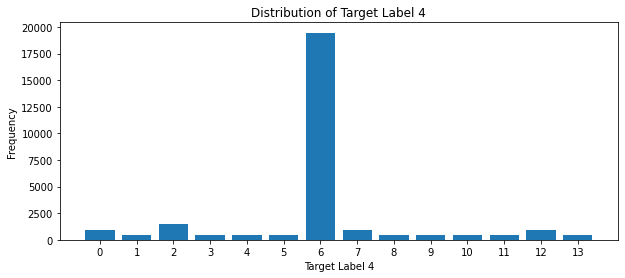

In [15]:
# Plot distribution of train_label4
labels, counts = np.unique(train_label4, return_counts=True)

plt.figure(figsize=(10, 4))
plt.xticks(labels)
plt.bar(labels, counts)
plt.xlabel('Target Label 4')
plt.ylabel('Frequency')
plt.title('Distribution of Target Label 4')
plt.show()

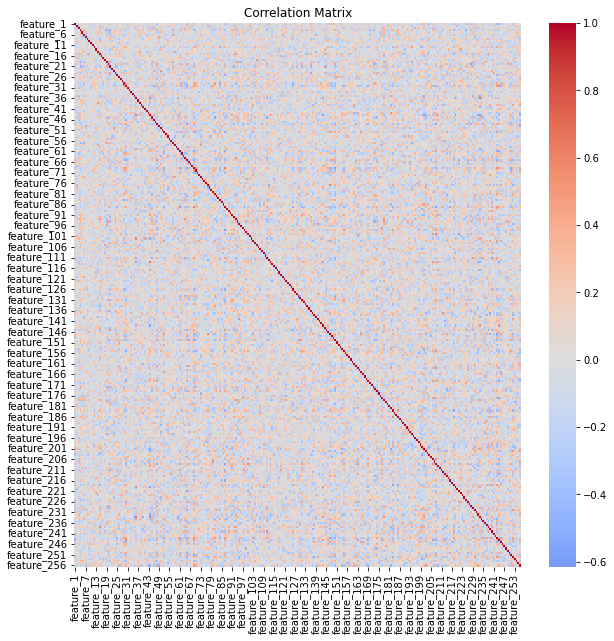

In [16]:
#Calculate the correlation matrix
correlation_matrix = train_features.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0)
plt.title("Correlation Matrix")
plt.show()

Identifying the features that are highly correlated with each other in the traning dataset

In [17]:
correlation_threshold = 0.9

highly_correlated = set()

# Find highly correlated features
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > correlation_threshold:
            colname = correlation_matrix.columns[i]
            highly_correlated.add(colname)

print(highly_correlated)

set()


In [18]:
# Remove highly correlated features
train_features = train_features.drop(columns=highly_correlated)
valid_features = valid_features.drop(columns=highly_correlated)
test_features = test_features.drop(columns=highly_correlated)

In [19]:
# Display the filtered train feature count
print("Filtered train features: {}".format(train_features.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(valid_features.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(test_features.shape))

Filtered train features: (28040, 256)
Filtered valid features: (750, 256)
Filtered test features: (750, 256)


Identify the features that are highly correlated with the label using the traning dataset

In [20]:
# Calculate the correlation matrix between features and train_label4
correlation_with_target = train_features.corrwith(train_label4)

# Correlation threshold
correlation_threshold = 0.05

# Select features that meet the correlation threshold
highly_correlated_features = correlation_with_target[correlation_with_target.abs() > correlation_threshold]

print(highly_correlated_features)

feature_2     -0.112897
feature_3      0.104591
feature_4      0.083657
feature_6      0.121945
feature_7     -0.090054
                 ...   
feature_248    0.065175
feature_249   -0.122432
feature_252    0.056447
feature_253   -0.092015
feature_256    0.081151
Length: 117, dtype: float64


Extract the features that are only highly correlated with the label4

In [21]:
train_features = train_features[highly_correlated_features.index]
valid_features = valid_features[highly_correlated_features.index]
test_features = test_features[highly_correlated_features.index]

Display the resulting feature shapes of the datasets

In [22]:
# Display the filtered train feature count
print("Filtered train features: {}".format(train_features.shape))

# Display the filtered valid feature count
print("Filtered valid features: {}".format(valid_features.shape))

# Display the filtered test feature count
print("Filtered test features: {}".format(test_features.shape))

Filtered train features: (28040, 117)
Filtered valid features: (750, 117)
Filtered test features: (750, 117)


Standardize the features of all datasets

In [23]:
scaler = StandardScaler()
standardized_train_features = scaler.fit_transform(train_features)
standardized_valid_features = scaler.transform(valid_features)
standardized_test_features = scaler.transform(test_features)

### Feature Extraction

Explained Variance Ratio after Dimensionality Reduction: [0.1184445  0.09072652 0.06507227 0.05005486 0.04713068 0.04104464
 0.03910434 0.03723173 0.03163609 0.02795112 0.02557697 0.02383692
 0.02148658 0.02029696 0.01891655 0.01777819 0.01622029 0.01528209
 0.01475617 0.01393114 0.01322547 0.01201098 0.01187466 0.01145369
 0.0109946  0.01016783 0.00948069 0.00928852 0.00877091 0.0079995
 0.00788361 0.00728552 0.00705327 0.00676362 0.00639023 0.00621243
 0.00588807 0.00552237 0.00519307 0.00488805 0.00478002 0.00437333
 0.00423299 0.0040577  0.003935   0.00385386 0.0035558  0.00335544
 0.00328268 0.00303556 0.002894   0.00268873 0.00262741]


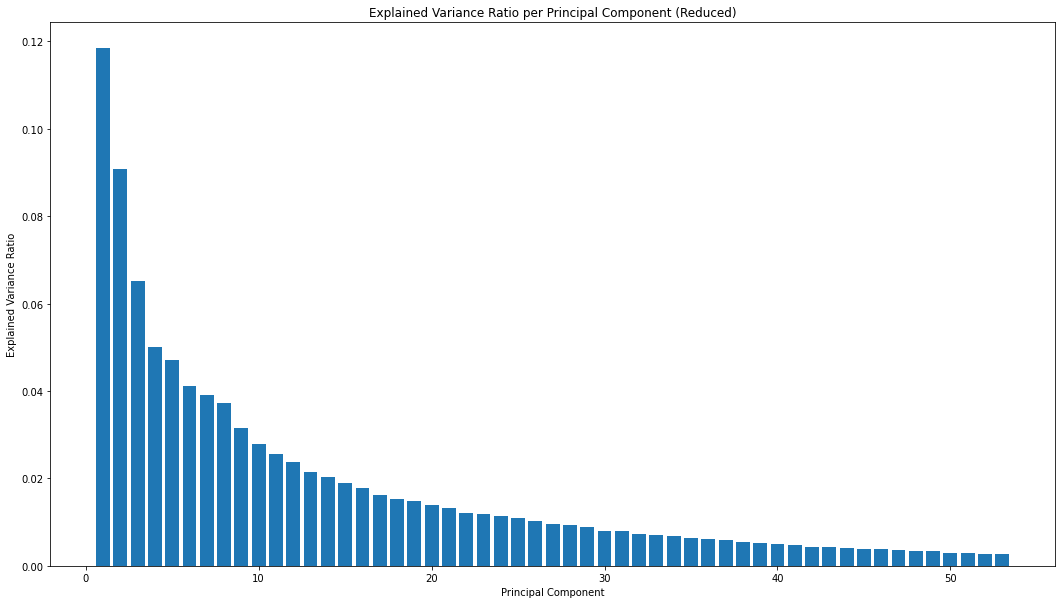

Reduced Train feature matrix shape: (28040, 53)
Reduced valid feature matrix shape: (750, 53)
Reduced test feature matrix shape: (750, 53)


In [24]:
variance_threshold = 0.95

# Apply PCA with the determined number of components
pca = PCA(n_components=variance_threshold, svd_solver='full')

pca_train_result = pca.fit_transform(standardized_train_features)
pca_valid_result = pca.transform(standardized_valid_features)
pca_test_result = pca.transform(standardized_test_features)

# Explained variance ratio after dimensionality reduction
explained_variance_ratio_reduced = pca.explained_variance_ratio_
print("Explained Variance Ratio after Dimensionality Reduction:", explained_variance_ratio_reduced)

# Plot explained variance ratio
plt.figure(figsize=(18, 10))
plt.bar(range(1, pca_train_result.shape[1] + 1), explained_variance_ratio_reduced)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio per Principal Component (Reduced)')
plt.show()

# Display the reduced train feature matrix
print("Reduced Train feature matrix shape: {}".format(pca_train_result.shape))
# Display the reduced valid feature matrix
print("Reduced valid feature matrix shape: {}".format(pca_valid_result.shape))
# Display the reduced test feature matrix
print("Reduced test feature matrix shape: {}".format(pca_test_result.shape))

K Neighbors is selected based on accuracy, precision and recall

In [25]:
# Number of features used in PCA
num_features = pca_train_result.shape[1]
print(f"Number of features: {num_features}\n")

model = KNeighborsClassifier()

# Train the model on the training data
model.fit(pca_train_result, train_label4)

# Predict on the train data
y_pred_train = model.predict(pca_train_result)

# Calculate metrics for classification evaluation
accuracy = accuracy_score(train_label4, y_pred_train)
precision = precision_score(train_label4, y_pred_train, average='weighted' , zero_division=1)
recall = recall_score(train_label4, y_pred_train, average='weighted')

print("KNN on train data:")
print('accuracy: ', accuracy)
print('precision: ',precision)
print('recall: ', recall)
print("\n")

# Predict on the validation data
y_pred_valid = model.predict(pca_valid_result)

# Calculate metrics for classification evaluation on validation data
accuracy = accuracy_score(valid_label4, y_pred_valid)
precision = precision_score(valid_label4, y_pred_valid, average='weighted', zero_division=1)
recall = recall_score(valid_label4, y_pred_valid, average='weighted')

print("KNN on valid data:")
print('accuracy: ', accuracy)
print('precision: ',precision)
print('recall: ', recall)
print("\n")

# Predict on the test data
y_pred_test = model.predict(pca_test_result)


Number of features: 53

KNN on train data:
accuracy:  0.9930456490727532
precision:  0.9930520514400105
recall:  0.9930456490727532


KNN on valid data:
accuracy:  0.9853333333333333
precision:  0.9859336219336221
recall:  0.9853333333333333




# Generate Output CSV

In [26]:
feature_count = pca_test_result.shape[1]

header_row = [f"new_feature_{i}" for i in range(1,feature_count+1)]

df = pd.DataFrame(pca_test_result, columns  = header_row)

df.insert(loc=0, column='Predicted labels before feature engineering', value=y_pred_base_test)
df.insert(loc=1, column='Predicted labels after feature engineering', value=y_pred_test)
df.insert(loc=2, column='No of new features', value=np.repeat(feature_count, pca_test_result.shape[0]))

df.to_csv('190137J_label_4.csv', index=False)